In [11]:
import sys
sys.path.insert(1, '../')
import numpy as np
import matplotlib.pyplot as plt
from util.coil import *
from util.fft import *
import util.simulator as simulate
from util.jg import *
from scipy.io import loadmat

In [12]:
ssfp_data = loadmat("vivodata/meas_MID495_bSSFP_8PC_nograd_FID42735_image.mat")["data"] 
[ny,nx,ph, nc] = ssfp_data.shape

D = np.reshape(ssfp_data, [ny * nx * ph, nc])
U, S, Vt = np.linalg.svd(D, full_matrices=False)
Nc = 6
ssfp_data = np.dot(D, Vt.T[:, :Nc]).reshape(ny, nx, ph, Nc)

In [13]:
data1 = loadmat("vivodata/meas_MID504_FEMR_nograd_PC0_fa25_FID42744_image.mat")["data"]
data2 = loadmat("vivodata/meas_MID505_FEMR_nograd_PC45_fa25_FID42745_image.mat")["data"]
data3 = loadmat("vivodata/meas_MID506_FEMR_nograd_PC90_fa25_FID42746_image.mat")["data"]
data4 = loadmat("vivodata/meas_MID507_FEMR_nograd_PC135_fa25_FID42747_image.mat")["data"]
femr_data = np.concatenate([data1, data2, data3, data4], 2) 
[ny,nx,ph, nc] = femr_data.shape

D = np.reshape(femr_data, [ny * nx * ph, nc])
U, S, Vt = np.linalg.svd(D, full_matrices=False)
Nc = 6
femr_data = np.dot(D, Vt.T[:, :Nc]).reshape(ny, nx, ph, Nc)

In [14]:
ssfp_image = ifft2c(ssfp_data)
ssfp_image = ssfp_image  / normalization_factor(ssfp_image)
ssfp_data = fft2c(ssfp_image)

ssfp_truth = rsos(rsos(ssfp_image,-1),-1)

[ny, nx, pc, nc] = ssfp_data.shape
ssfp_acs = simulate.acs(ssfp_data, (32, 32))
ssfp_dataR = np.zeros([ny, nx, pc, nc], dtype = complex)
R = 4
ssfp_dataR[::R] = ssfp_data[::R]

In [15]:
kh = [2, 4, 6]
kw = [3, 5, 7, 9]
error = np.zeros([3,4])
for x,h in enumerate(kh):
    for y,w in enumerate(kw): 
        ssfp_recon = joint_grappa(ssfp_dataR, ssfp_acs, kh = h, kw = w,lamda = 2e-11, R = R)
        error[x,y] = (MSE(ssfp_truth,ssfp_recon))

In [16]:
min_error_index = np.unravel_index(np.argmin(error), error.shape)
min_error_index # kh = 2 kw = 5

(0, 1)

In [17]:
lamda = np.logspace(-10,-12,20)
error = []
for r in lamda: 
    ssfp_recon = joint_grappa(ssfp_dataR, ssfp_acs, kh = 4, kw = 7,lamda = r, R = R)
    error.append((MSE(ssfp_truth,ssfp_recon)))

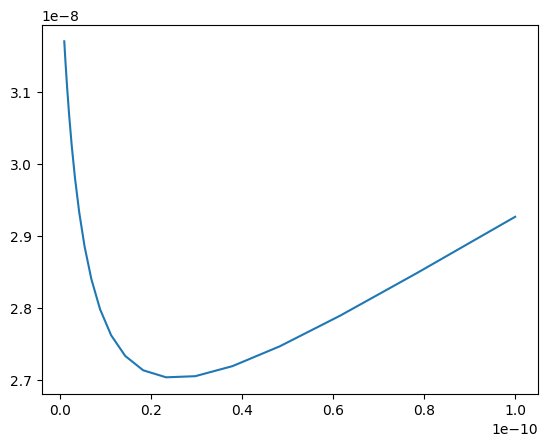

In [18]:
plt.figure()
plt.plot(lamda, error)
plt.show()

In [19]:
min_index = np.argmin(error)
lamda[min_index]

2.3357214690901212e-11